In [74]:
from functions import *
from xgboost import XGBRegressor

In [75]:
# Исходные данные
n_samples = 50 # количество данныз в датасете (если не какая-то специальная матрица плана)
limits = (-10, 10) # пределы варьирования признаков
function_name = 'rosenbrock_8d'# имя функции по которй мы генерим искуственный датасет
random_seed = 1488 # набор для генерации случайных чисел
test_ratio = 0.1 # количество данных (от всей выборки) которые мы выделяем на тестирование модели
matrix_type = 'random_uniform'  #варианты: 'ff2n', 'pbdesign', 'bbdesign', 'ccdesign', 'lhs', 'random_uniform'

In [76]:
# Генерим искусственный датасет для обучения, для этого:
# Определяем функцию
main_function = Functions() # Инициализация класса для хранения функции
main_function.limits = limits # назначаем пределы варьирования
main_function.random_seed = random_seed # назначаем набор для генерации случайных чисел
functions = main_function.get_function_dict() # словарь с доступными нам функциями
main_function.set_function(functions[function_name]) # собственно назначаем функцию на основе которой будем данные генерить
# Определяем матрицу планирвоания эксперимента (сначала в кодированном масштабе)
training_matrix = Generate_coded_data(main_function, n_samples, random_seed=random_seed) # инициализация класса
training_matrix.set_matrix_type(matrix_type) # определение типа матрицы планирования
training_X_coded = training_matrix.X_coded # генерация матрицы плана в кодированном масштабе (в данном случае Латинский гиперкуб)
# Пересчитываем матрицу планирования из кодированного в натуральный масштаб и определяем вектор целевой переменной
training_data = Generate_natural_data(main_function, training_X_coded) # инициализация объекта для генерации данных в натуральном масштабе
training_data.convert_coded_to_natural() # пересчитываем матрицу планирования из кодированного в натуральный масштаб
training_features = training_data.features # создаем переменную признаков в натуральном масштабе
training_target = training_data.target # создаем переменную для выходной функции

In [77]:
# Генерим искусственный датасет для тестирования модели для этого:
n_test_samples = int(n_samples * test_ratio) # определяем количество точек для тестирвоания модели
testing_matrix = Generate_coded_data(main_function, n_test_samples, random_seed=random_seed+1) # инициируем объект создания матрицы в кодированном масштабе
testing_matrix.set_matrix_type('random_uniform') # генерация точек для тестирования в кодированном масштабе 
testing_X_coded = testing_matrix.X_coded # создаем переменную для тестирования в кодированном масштабе
testing_data = Generate_natural_data(main_function, testing_X_coded) # инициализируем объект для перевода из кодированного в натуральный масштаб
testing_data.convert_coded_to_natural() # конвертация точек для проверки из кодированного в натуральный масштаб
testing_features = testing_data.features # переменная признаков для тестирвоания
testing_target = testing_data.target # переменная целевой функции для тестирования

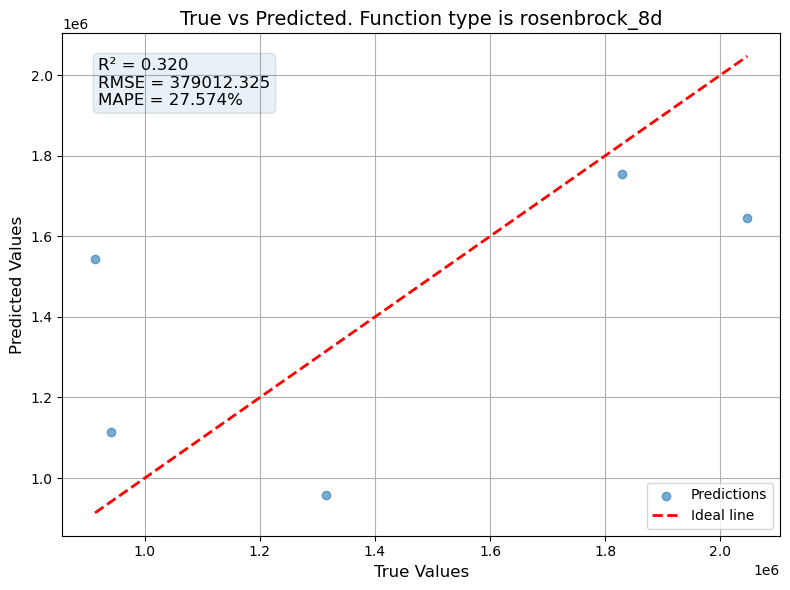

In [78]:
# Обучение модели (на основе XGBRegressor)
# создаем модель
model = XGBRegressor(
                    n_estimators=1000,
                    max_depth=2,
                    learning_rate=0.1,
                    reg_alpha=0.5,
                    reg_lambda=0.1,
                    subsample=0.9,
                    random_state=1488,
                    verbosity=0
                    )
# обучаем модель
model.fit(training_X_coded, training_target);
# Расчитываем отклик по данным для проверки
y_pred_test = model.predict(testing_X_coded)

# Посмотрим на график паритета
plot_true_vs_predicted(testing_target, y_pred_test,  title=f"True vs Predicted. Function type is {function_name}")